In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install tabulate

In [14]:
# import python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import os

In [15]:
current_dir = os.getcwd()
file_path = current_dir + "/Data Assignment.xlsx"
print(file_path)

C:\Users\Shivangi\Downloads\Data_Analyst _Assigment/Data Assignment.xlsx


In [16]:
Table_1= pd.read_excel(file_path,sheet_name='Associate ABC') #data import
Table_2= pd.read_excel(file_path,sheet_name='Associate XYZ')
Table_3= pd.read_excel(file_path,sheet_name='Associate KLM')


In [17]:
print("Shape of DataFrame 1:", Table_1.shape)
print("Shape of DataFrame 2:", Table_2.shape)
print("Shape of DataFrame 3:", Table_3.shape)

Shape of DataFrame 1: (82, 3)
Shape of DataFrame 2: (61, 3)
Shape of DataFrame 3: (124, 3)


**DATA CLEANING**

In [18]:
#Do you remove missing values from the data-set for analysis? Provide rationale for your answer.
# 1. Check for missing values
missing_values = Table_1.isnull().sum()
print("Missing Values Table_1:")
print(missing_values)

missing_values = Table_2.isnull().sum()
print("\n Missing Values Table_2:")
print(missing_values)

missing_values = Table_3.isnull().sum()
print("\n Missing Values Table_3:")
print(missing_values)

Missing Values Table_1:
Date                           0
No of Leads                   34
Time Spent on LG (in mins)    24
dtype: int64

 Missing Values Table_2:
Date                           0
No of Leads                   20
Time Spent on LG (in mins)    20
dtype: int64

 Missing Values Table_3:
Date                 0
No of Leads         14
Time Spent on LG    17
dtype: int64


In [19]:
Table_1.dropna(inplace= True)
Table_2.dropna(inplace= True)
Table_3.dropna(inplace= True)

In [20]:
print("Shape of DataFrame 1:", Table_1.shape)
print("Shape of DataFrame 2:", Table_2.shape)
print("Shape of DataFrame 3:", Table_3.shape)

Shape of DataFrame 1: (48, 3)
Shape of DataFrame 2: (41, 3)
Shape of DataFrame 3: (107, 3)


In [21]:
# 2. Check data types
data_types = Table_1.dtypes
print("Data Types:")
print(data_types)

data_types = Table_2.dtypes
print("\nData Types:")
print(data_types)

data_types = Table_3.dtypes
print("\nData Types:")
print(data_types)

Data Types:
Date                          datetime64[ns]
No of Leads                          float64
Time Spent on LG (in mins)           float64
dtype: object

Data Types:
Date                          datetime64[ns]
No of Leads                          float64
Time Spent on LG (in mins)           float64
dtype: object

Data Types:
Date                datetime64[ns]
No of Leads                float64
Time Spent on LG           float64
dtype: object


**Data Exploration**

In [22]:
#KPIs
# Concatenate the DataFrames
all_tables = pd.concat([Table_1, Table_2, Table_3], ignore_index=True)
# Convert the 'Date' column to datetime format
all_tables['Date'] = pd.to_datetime(all_tables['Date'])

# Calculate KPIs
all_tables['Leads per Day'] = all_tables.groupby('Date')['No of Leads'].transform('mean')
all_tables['Time Spent per Day (in mins)'] = all_tables.groupby('Date')['Time Spent on LG (in mins)'].transform('mean')
all_tables['Conversion Rate (Leads per Hour)'] = all_tables['No of Leads'] / (all_tables['Time Spent on LG (in mins)'] / 60)
total_leads_generated = all_tables['No of Leads'].sum()

# Display KPIs
average_leads_per_day = all_tables['Leads per Day'].mean()
average_time_spent_per_day = all_tables['Time Spent per Day (in mins)'].mean()
average_conversion_rate = all_tables['Conversion Rate (Leads per Hour)'].mean()

print(f'Average Leads Generated per day: {average_leads_per_day}')
print(f'Average Time Spent per day: {average_time_spent_per_day} mins')
print(f'Average Conversion Rate (Leads per Hour): {average_conversion_rate} leads/hour')
print(f'Total Leads Generated over the given time period: {total_leads_generated}')


Average Leads Generated per day: 9.25
Average Time Spent per day: 365.84635416666663 mins
Average Conversion Rate (Leads per Hour): 1.4179664085914085 leads/hour
Total Leads Generated over the given time period: 1813.0


**Data Analysis and Visualization**

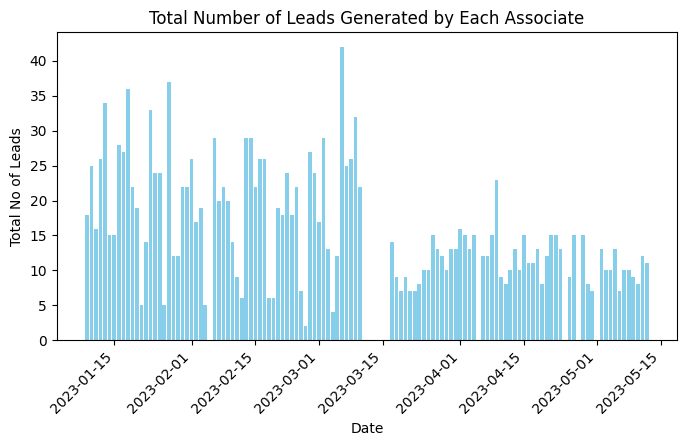

In [23]:
#What is the total number of leads generated by Each Associate
# Concatenate the tables vertically to create a single DataFrame
all_tables = pd.concat([Table_1, Table_2, Table_3], ignore_index=True)

# Group by 'Date' and sum the 'No of Leads' for each associate
total_leads_by_associate = all_tables.groupby('Date')['No of Leads'].sum().reset_index()

# Plotting using Matplotlib
plt.figure(figsize=(8, 4))
plt.bar(total_leads_by_associate['Date'], total_leads_by_associate['No of Leads'], color='skyblue')
plt.title('Total Number of Leads Generated by Each Associate')
plt.xlabel('Date')
plt.ylabel('Total No of Leads')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

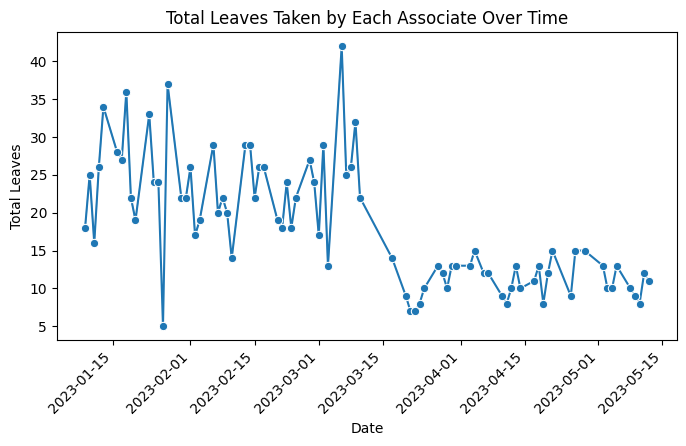

In [24]:
#What is the total number of leaves taken by each associate (considering Saturday and Sunday as holidays)?
 # Concatenate the tables vertically to create a single DataFrame
all_tables = pd.concat([Table_1, Table_2, Table_3], ignore_index=True)

# Convert the 'Date' column to datetime format
all_tables ['Date'] = pd.to_datetime(all_tables ['Date'])

# Calculate the total time spent on LG for each associate
all_tables ['Total Time Spent on LG (in mins)'] = all_tables .groupby('Date')['Time Spent on LG (in mins)'].transform('sum')

# Assuming Saturday and Sunday are weekends (holidays)
all_tables ['Day_of_Week'] = all_tables ['Date'].dt.day_name()
weekend_days = ['Saturday', 'Sunday']
all_tables ['Is_Weekend'] = all_tables ['Day_of_Week'].isin(weekend_days)

# Filter out weekends
working_days_df = all_tables [~all_tables ['Is_Weekend']]

# Calculate the total number of leaves taken by each associate
total_leaves = working_days_df.groupby('Date')['No of Leads'].transform('sum')

# Add the total leaves column to the original DataFrame
all_tables ['Total Leaves'] = total_leaves

# Plotting
plt.figure(figsize=(8, 4))
sns.lineplot(x='Date', y='Total Leaves', data=all_tables, marker='o')
plt.xticks(rotation=45, ha='right')  # Rotate the labels at a 45-degree angle
plt.title('Total Leaves Taken by Each Associate Over Time')
plt.xlabel('Date')
plt.ylabel('Total Leaves')
plt.show()


Average Number of Leads for Associate ABC: 6.541666666666667
Average Number of Leads for Associate XYZ: 10.853658536585366
Average Number of Leads for Associate KLM: 9.850467289719626


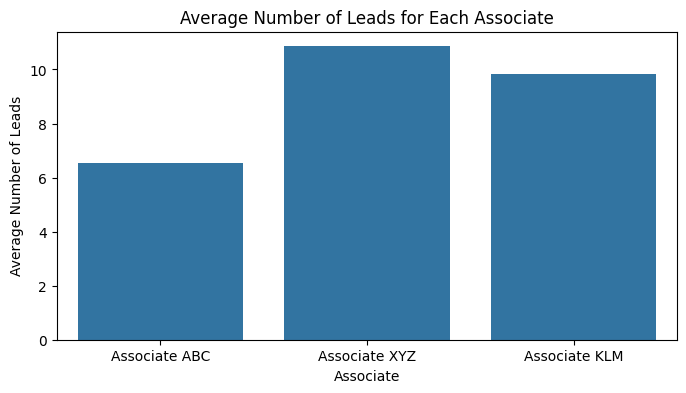

In [25]:
#What is the average number of leads generated by each associate?
# Calculate the average number of leads for each table
average_leads_by_table1 = Table_1['No of Leads'].mean()
average_leads_by_table2 = Table_2['No of Leads'].mean()
average_leads_by_table3 = Table_3['No of Leads'].mean()

# Display the result
print(f"Average Number of Leads for Associate ABC: {average_leads_by_table1}")
print(f"Average Number of Leads for Associate XYZ: {average_leads_by_table2}")
print(f"Average Number of Leads for Associate KLM: {average_leads_by_table3}")

# Create a DataFrame for visualization
average_leads_df = pd.DataFrame({
    'Associate': ['Associate ABC', 'Associate XYZ', 'Associate KLM'],
    'Average Leads': [average_leads_by_table1, average_leads_by_table2, average_leads_by_table3]
})

# Visualization using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Associate', y='Average Leads', data=average_leads_df)
plt.title('Average Number of Leads for Each Associate')
plt.xlabel('Associate')
plt.ylabel('Average Number of Leads')
plt.show()

Most Consistent Associate in Lead Generation:
Associate      Associate XYZ
mean               10.853659
std                 2.555005
Consistency         0.235405
Name: 2, dtype: object


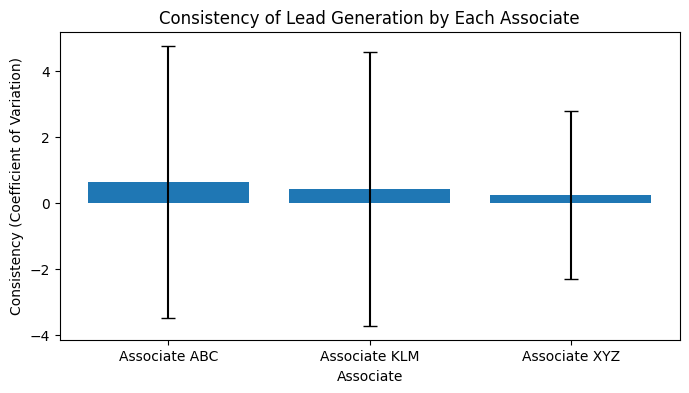

In [26]:
#Which associate has been the most consistent in lead generation?
# Assuming 'Table1', 'Table2', and 'Table3' are your DataFrames
# Load your DataFrames as described in the previous answers

# Create a new column indicating the table name
Table_1['Associate'] = 'Associate ABC'
Table_2['Associate'] = 'Associate XYZ'
Table_3['Associate'] = 'Associate KLM'

# Concatenate the tables vertically to create a single DataFrame
all_tables = pd.concat([Table_1, Table_2, Table_3], ignore_index=True)

# Group by table and calculate the mean and standard deviation of leads
consistency_by_table = all_tables.groupby('Associate')['No of Leads'].agg(['mean', 'std']).reset_index()

# Calculate a consistency metric (e.g., coefficient of variation)
consistency_by_table['Consistency'] = consistency_by_table['std'] / consistency_by_table['mean']

# Find the table with the lowest coefficient of variation (most consistent)
most_consistent_table = consistency_by_table.loc[consistency_by_table['Consistency'].idxmin()]

# Display the result
print("Most Consistent Associate in Lead Generation:")
print(most_consistent_table)

# Visualization using a bar chart
plt.figure(figsize=(8, 4))
plt.bar(consistency_by_table['Associate'], consistency_by_table['Consistency'], yerr=consistency_by_table['std'], capsize=5)
plt.title('Consistency of Lead Generation by Each Associate')
plt.xlabel('Associate')
plt.ylabel('Consistency (Coefficient of Variation)')
plt.show()